# 使用vgg16模型进行图片预测 #  

前面我们学习了使用cifra10来判断图片的类别，今天我们使用更加强大的已经训练好的模型来预测图片的类别，那就是vgg16,对应的供keras使用的模型人家已经帮我们训练好，我可不想卖肾来买一个gpu。。。
对应的模型在 ['vgg16'](https://drive.google.com/file/d/0Bz7KyqmuGsilT0J5dmRCM0ROVHc/view?usp=sharing) 可以下载。估计被墙了，附上链接(http://pan.baidu.com/s/1qX0CJSC)

## 导入必要的库 ##

In [2]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import cv2, numpy as np

Using Theano backend.
D:\Anaconda\lib\site-packages\theano-0.8.0.dev0-py2.7.egg\theano\tensor\signal\downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


## 使用keras建立vgg16模型 ##

In [3]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [4]:
model = VGG_16('vgg16_weights.h5')

In [5]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

## 现在我们开始来预测了 ##

首先写一个方法来加载并处理图片

In [6]:
def load_image(imageurl):
    im = cv2.resize(cv2.imread(imageurl),(224,224)).astype(np.float32)
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    im = im.transpose((2,0,1))
    im = np.expand_dims(im,axis=0)
    return im

## 读取vgg16的类别文件 ##

In [7]:
f = open('synset_words.txt','r')
lines = f.readlines()
f.close()

In [17]:
def predict(url):
    im = load_image(url)
    pre = np.argmax(model.predict(im))
    print lines[pre]

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
from IPython.display import Image

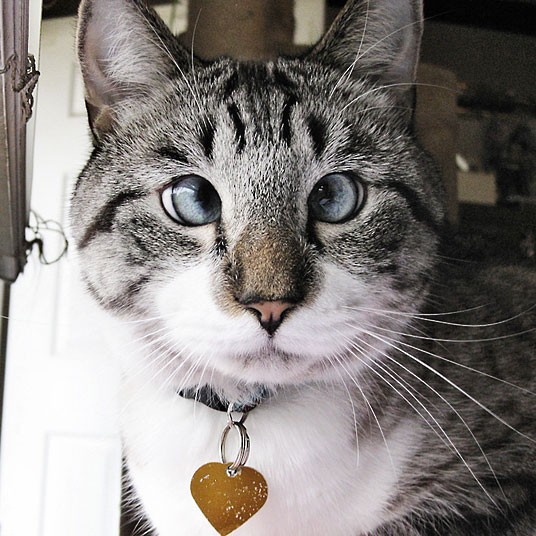

In [20]:
Image('cat1.jpg')

## 开始预测 ##

In [21]:
predict('cat1.jpg')

n02123045 tabby, tabby cat



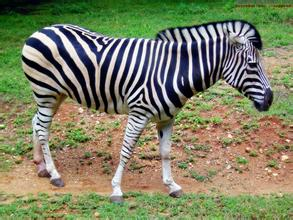

In [22]:
Image('zebra.jpg')

In [23]:
predict('zebra.jpg')

n02391049 zebra



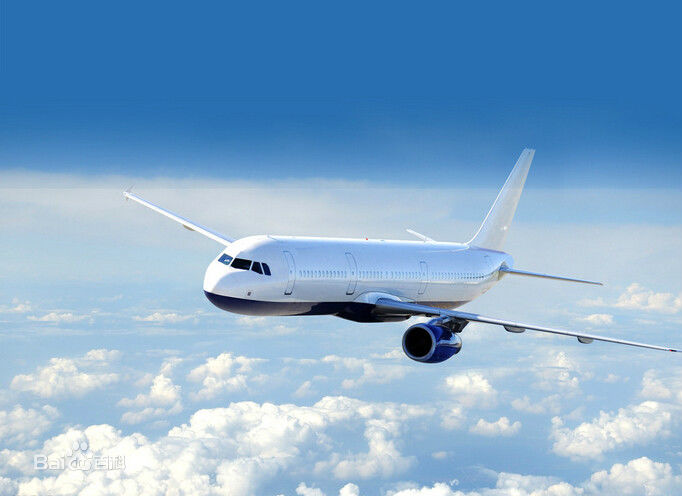

In [24]:
Image('airplane.jpg')

In [25]:
predict('airplane.jpg')

n02690373 airliner



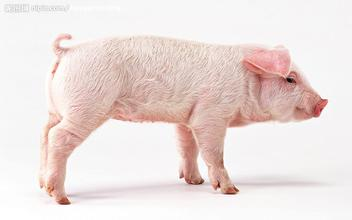

In [26]:
Image('pig.jpg')

In [27]:
predict('pig.jpg')

n02395406 hog, pig, grunter, squealer, Sus scrofa



可见，判断率还是很高的。。。。

# 总结 #

通过这次学习，学会了使用keras来搭建模型，使用vgg16这个模型。